In [64]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#过采样算法
from imblearn.combine import SMOTEENN
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE, ADASYN

#模型验证
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss,balanced_accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_excel('C:\\Users\\Administrator\\Desktop\\finaldata171819.xlsx')

In [3]:
data.head()

,code,name,x1,x2,x3,x4,x5,x6,x8,x9,...,x25,x26,x27,x28,x29,x30,x31,x32,x33,y
0,000008.SZ,神州高铁,0.1160,4.51,4.6568,4.6123,13.3295,99.532546,2.0324,1.7825,...,-5.642545,-0.2124,1.046636e+10,1.096330e+10,0,20.00,12.42,14.075216,9.47,0
1,000012.SZ,南玻A,0.1600,5.16,4.5764,5.0366,4.4506,97.738294,0.7955,0.6986,...,11.145506,0.7440,1.911423e+10,9.583139e+09,0,14.81,3.76,6.891779,3.44,0
2,000016.SZ,深康佳A,0.1708,5.11,3.4569,4.9769,1.4495,29.509631,0.9633,0.7213,...,-9.791778,-1.3413,3.298506e+10,6.751176e+09,0,21.75,7.56,1.391584,0.05,0
3,000020.SZ,深华发A,0.0116,1.02,2.6822,2.4667,0.5172,88.113907,1.0928,0.8779,...,-3.548016,-0.0773,6.170902e+08,2.312342e+09,0,41.21,5.85,6.045900,64.09,0
4,000021.SZ,深科技,0.3603,8.67,4.7497,4.5960,3.5202,100.063296,1.1195,0.8758,...,2.707769,0.2860,1.553938e+10,8.459741e+09,0,44.51,7.25,2.574738,0.02,0


2275


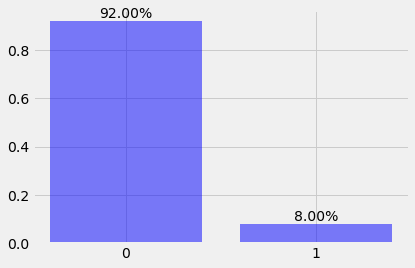

In [4]:
print(data.y.count())
a=data.y[data.y==0].count()/data.y.count()
plt.bar(['0','1'],[a,1-a],alpha=0.5,color='blue')
for a, b, label in zip(['0','1'],[a,1-a],[a,1-a]):
    plt.text(a,
             b,
             format(label,'.02%'),
             ha='center', 
             va='bottom')

In [5]:
data=data.drop(['code','name'],axis=1)

In [6]:
y=data.iloc[:,-1]
X=data.iloc[:,:-1]

In [7]:
y.value_counts()

0    2093
1     182
Name: y, dtype: int64

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
data_0=data[data.y==0]
data_1=data[data.y==1]
train_0,test_0=train_test_split(data_0,test_size=0.15,random_state=19)
train_1,test_1=train_test_split(data_1,test_size=0.15,random_state=19)

train0,eva0=train_test_split(train_0,test_size=0.15,random_state=19)
train1,eva1=train_test_split(train_1,test_size=0.15,random_state=19)

train=pd.concat([train0,train1])
eva=pd.concat([eva0,eva1])
test=pd.concat([test_0,test_1])

In [9]:
Xtrain=train.iloc[:,:-1]
ytrain=train.iloc[:,-1]
Xeva=eva.iloc[:,:-1]
yeva=eva.iloc[:,-1]
Xtest=test.iloc[:,:-1]
ytest=test.iloc[:,-1]

In [10]:
from imblearn.over_sampling import SMOTE
#过采样，好坏客户平分
sm = SMOTE(random_state=19,sampling_strategy=0.4)
#sm = SMOTE(random_state=42,sampling_strategy="auto")
#sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(Xtrain, ytrain)
print(y_resampled.value_counts())

0    1512
1     604
Name: y, dtype: int64


In [11]:
print(ytrain.value_counts())
print(y_resampled.value_counts())
print(yeva.value_counts())
print(ytest.value_counts())

0    1512
1     130
Name: y, dtype: int64
0    1512
1     604
Name: y, dtype: int64
0    267
1     24
Name: y, dtype: int64
0    314
1     28
Name: y, dtype: int64


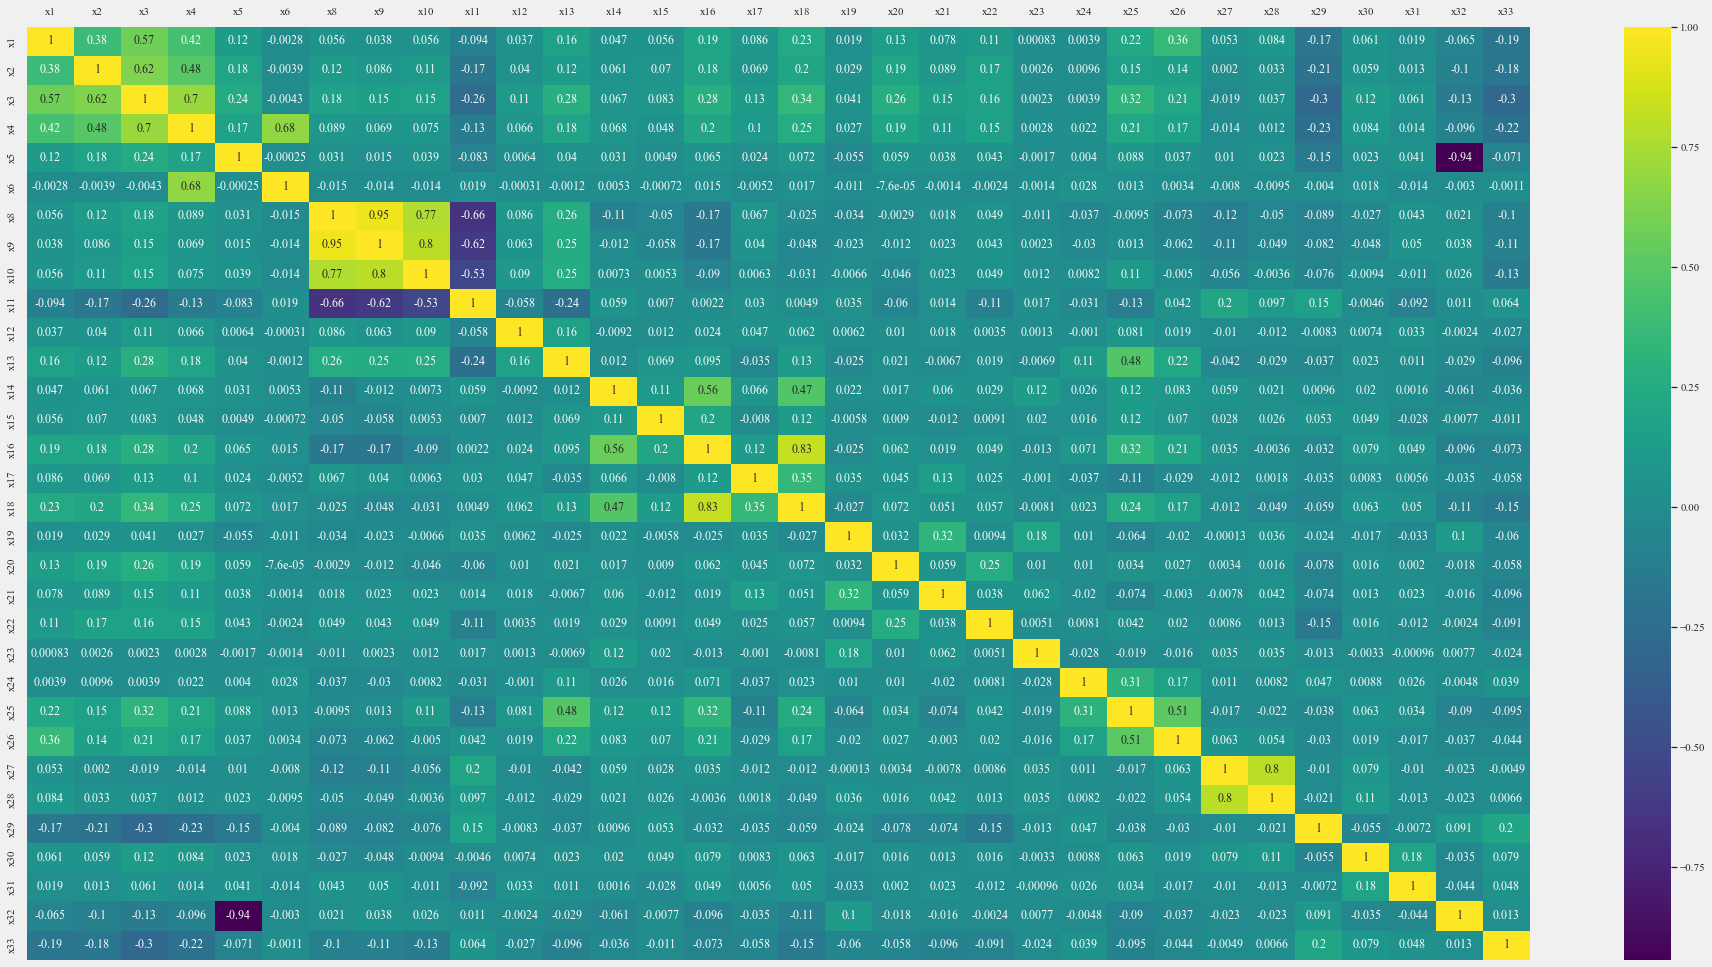

In [12]:
cfit=X_resampled.corr()
fig = plt.figure(figsize = (30,16))
sns.set(font_scale=1)
plt.rc('font',family='Times New Roman',size=12)

ax = sns.heatmap(cfit, cmap="viridis", annot = True)
ax.tick_params(axis='x',labelsize=11, labeltop=True, labelbottom=False)

In [13]:
def drop_corr(X):
    X=X.drop(['x3','x32','x9','x10','x28','x18'],axis=1)
    return X
ytrain=y_resampled
Xtrain=drop_corr(X_resampled)
Xeva=drop_corr(Xeva)

In [14]:
"""
def take_X(X):
    X=X[['x5','x6','x13','x19','x23','x25','x26','x33']]
    return X
Xtrain=take_X(X_resampled)
Xeva=take_X(Xeva)
"""


"\ndef take_X(X):\n    X=X[['x5','x6','x13','x19','x23','x25','x26','x33']]\n    return X\nXtrain=take_X(X_resampled)\nXeva=take_X(Xeva)\n"

---------------------------------------GBDT--------------------------------------------------------

In [40]:
n_estimators=1000
eta=0.02
random_state=42

## Start Coding Here ##

# Initialize the model

GBDT = GradientBoostingClassifier( # default setting is least-squares boosting
    n_estimators=n_estimators, 
    learning_rate=eta, 
    random_state=19
)



# We then fit the model to the training data

GBDT.fit(Xtrain,ytrain.values.ravel())

GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000,
                           random_state=19)

In [41]:
y_pred=GBDT.predict(Xeva)
y_true =yeva
 
accuracyScore = accuracy_score(y_true, y_pred)
print('eva accuracy is:',accuracyScore)
 
#precision,TP/(TP+FP) （真阳性）/（真阳性+假阳性）
precision=precision_score(y_true, y_pred)
print('eva precision is:',precision)
 
#recall（sensitive）敏感度，(TP)/（TP+FN）
sensitivity=recall_score(y_true, y_pred)
print('eva sensitivity is:',sensitivity)
  
#F1 = 2 x (精确率 x 召回率) / (精确率 + 召回率)
#F1 分数会同时考虑精确率和召回率，以便计算新的分数。可将 F1 分数理解为精确率和召回率的加权平均值，其中 F1 分数的最佳值为 1、最差值为 0：
f1Score=f1_score(y_true, y_pred)
print("f1_score:",f1Score)


eva accuracy is: 0.9175257731958762
eva precision is: 0.5
eva sensitivity is: 0.5833333333333334
f1_score: 0.5384615384615384


In [42]:
fpr,tpr,thresholds=roc_curve(yeva,y_pred)
roc_auc=auc(fpr,tpr)
ks=max(tpr-fpr)
ar=2*roc_auc-1
gini=ar
print('ks is',ks)
print('gini is',gini)

ks is 0.5308988764044944
gini is 0.5308988764044944


In [43]:
f1_train = np.zeros((n_estimators,))

for i, Y_pred in enumerate(GBDT.staged_predict(Xtrain)):
    f1_train[i]=f1_score(ytrain, Y_pred)

# Compute the test mean squared errors
f1_eva = np.zeros((n_estimators,))


## Start Coding Here ##
    
for i, Y_pred in enumerate(GBDT.staged_predict(Xeva)):
    f1_eva[i]=f1_score(yeva, Y_pred)
    

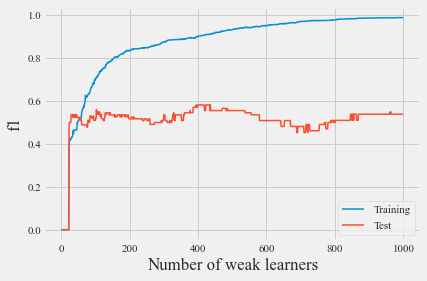

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(
    np.arange(n_estimators) + 1,
    f1_train,
    label="Training",
    linewidth=1.5
)
ax.plot(
    np.arange(n_estimators) + 1,
    f1_eva,
    label="Test",
    linewidth=1.5
)

#ax.set_ylim((0.0, 1))
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("f1")

leg = ax.legend(loc="lower right", fancybox=True)

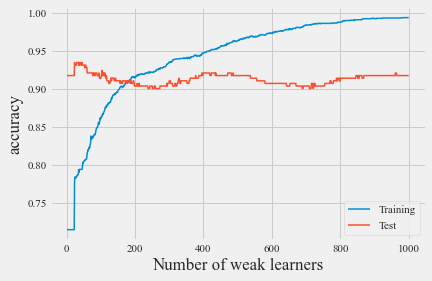

In [50]:
accuracy_train = np.zeros((n_estimators,))

for i, Y_pred in enumerate(GBDT.staged_predict(Xtrain)):
    accuracy_train[i]=accuracy_score(ytrain, Y_pred)

accuracy_eva = np.zeros((n_estimators,))

for i, Y_pred in enumerate(GBDT.staged_predict(Xeva)):
    accuracy_eva[i]=accuracy_score(yeva, Y_pred)
    
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(
    np.arange(n_estimators) + 1,
    accuracy_train,
    label="Training",
    linewidth=1.5
)
ax.plot(
    np.arange(n_estimators) + 1,
    accuracy_eva,
    label="Test",
    linewidth=1.5
)

#ax.set_ylim((0.0, 1))
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("accuracy")

leg = ax.legend(loc="lower right", fancybox=True)

In [56]:
n_estimators=500
eta_range = [0.01,0.1,1]
eva_f1_dict = {}

for eta in eta_range:
    eva_f1_dict[eta] = np.zeros((n_estimators))
    
    ## Start Coding Here
    
    GBDT = GradientBoostingClassifier( # default setting is least-squares boosting
        n_estimators=n_estimators, 
        learning_rate=eta, 
        random_state=42
    )
    GBDT.fit(Xtrain,ytrain.values.ravel())
    for i, Y_pred in enumerate(GBDT.staged_predict(Xeva)):
        eva_f1_dict[eta][i]=f1_score(yeva,Y_pred)


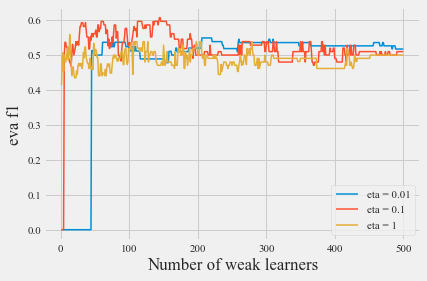

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
for eta in eta_range:
    ax.plot(
        np.arange(n_estimators) + 1,
        eva_f1_dict[eta],
        label="eta = "+str(eta),
        linewidth=1.5
    )
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("eva f1")

leg = ax.legend(loc="lower right", fancybox=True)

In [61]:
n_estimators=500
eta=0.02
random_state=42
T_range = [2,4,11,30]
eva_f1_dict = {}

for T in T_range:
    eva_f1_dict[T] = np.zeros((n_estimators))
    
    ## Start Coding Here ##
    GBDT = GradientBoostingClassifier( # default setting is least-squares boosting
        max_leaf_nodes=T,
        n_estimators=n_estimators, 
        learning_rate=0.02, 
        random_state=42
    )
    GBDT.fit(Xtrain,ytrain.values.ravel())
    for i, Y_pred in enumerate(GBDT.staged_predict(Xeva)):
        eva_f1_dict[T][i]=f1_score(yeva,Y_pred)

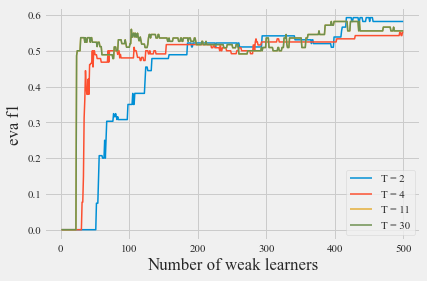

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

for T in T_range:
    ax.plot(
        np.arange(n_estimators) + 1,
        eva_f1_dict[T],
        label="T = "+str(T),
        linewidth=1.5
    )
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("eva f1")

leg = ax.legend(loc="lower right", fancybox=True)

In [70]:
#To overcome the data imbalance problem, economists suggest comparing the predicted probabilities with a different threshold from 1/2 
#when making predictions. Roughly, there are three opinions
#Chauvet and Piger (2008) suggest searching between 0.3 and 0.6 to find the optimal threshold.

# Extrat the predicted probabilities on the eva set
GBDT = GradientBoostingClassifier( # default setting is least-squares boosting
        max_leaf_nodes=2,
        n_estimators=440, 
        learning_rate=0.02, 
        random_state=42
    )
GBDT.fit(Xtrain,ytrain.values.ravel())
proba_pred=GBDT.predict_proba(Xeva)

# Generate a grid of thresholds between 0.3 and 0.6
num_thresholds=200
threshold_range=np.linspace(0.3,0.6,num_thresholds)

# Initialize the array to store scores
accuracy_score_threshold=np.zeros((num_thresholds,))
balanced_accuracy_score_threshold=np.zeros((num_thresholds,))
f1_score_threshold=np.zeros((num_thresholds,))
precision_threshold=np.zeros((num_thresholds,))
sensitivity_threshold=np.zeros((num_thresholds,))
ks_threshold=np.zeros((num_thresholds,))

for i in range(num_thresholds):
    Y_pred=proba_pred[:,1]>threshold_range[i]
    accuracy_score_threshold[i]=accuracy_score(yeva,Y_pred)
    balanced_accuracy_score_threshold[i]=balanced_accuracy_score(yeva,Y_pred)
    f1_score_threshold[i]=f1_score(yeva,Y_pred)
    precision_threshold[i]=precision_score(yeva, Y_pred)
    sensitivity_threshold[i]=recall_score(yeva, Y_pred)
    fpr,tpr,thresholds=roc_curve(yeva,Y_pred)
    roc_auc=auc(fpr,tpr)
    ks_threshold[i]=max(tpr-fpr)


In [71]:
index=np.argmax(f1_score_threshold)
best_threshold=threshold_range[index]
print(best_threshold)
print(accuracy_score_threshold[index])
print(f1_score_threshold[index])
print(precision_threshold[index])
print(sensitivity_threshold[index])
print(ks_threshold[index])

0.4492462311557789
0.9140893470790378
0.6031746031746031
0.48717948717948717
0.7916666666666666
0.7167602996254682


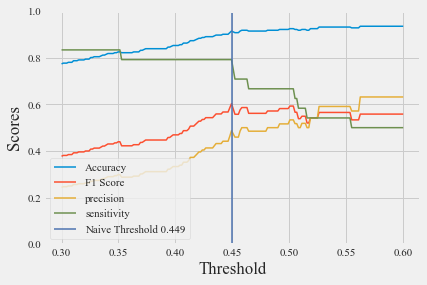

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(
    threshold_range,
    accuracy_score_threshold,
    label='Accuracy',
    linewidth=1.5
)

ax.plot(
    threshold_range,
    f1_score_threshold,
    label='F1 Score',
    linewidth=1.5
)

ax.plot(
    threshold_range,
    precision_threshold,
    label='precision',
    linewidth=1.5
)

ax.plot(
    threshold_range,
    sensitivity_threshold,
    label='sensitivity',
    linewidth=1.5
)


plt.axvline(x = best_threshold, color = 'b', label =  f'Naive Threshold {round(best_threshold,3)}',linewidth=1.5)

ax.set_ylim((0.0, 1))
ax.set_xlabel("Threshold")
ax.set_ylabel("Scores")

leg = ax.legend(loc="lower left", fancybox=True)

AUC: 0.8857677902621722


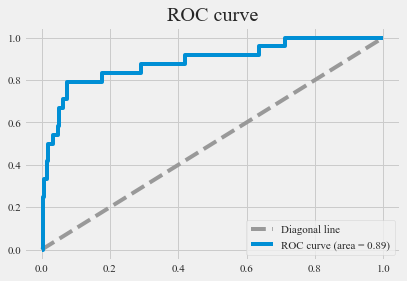

In [73]:
#"""
proba_bad=GBDT.predict_proba(Xeva)
y_scores=pd.DataFrame(proba_bad)[1]
y_scores=np.array(y_scores)
#auc分数
#auc分数有两种计算方式，第一种是根据目标变量y_true,预测分数/预测概率y_socres,通过roc_auc_score(y_true, y_scores)计算AUC
AUC=roc_auc_score(y_true, y_scores)
print("AUC:",AUC)
#auc第二种方法是通过fpr,tpr，通过auc(fpr,tpr)来计算AUC
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores, pos_label=1)
AUC1 = auc(fpr,tpr) ###计算auc的值
           
#绘制ROC曲线
#画对角线
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Diagonal line')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % AUC)
plt.title('ROC curve') 
plt.legend(loc="lower right")  


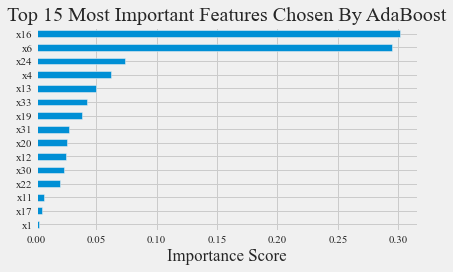

In [77]:
feature_names = list(Xtrain.columns)

feature_importances = pd.Series(
    GBDT.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = feature_importances.iloc[-15:].plot.barh()
ax.set_title("Top 15 Most Important Features Chosen By AdaBoost")
ax.set_xlabel("Importance Score")
ax.figure.tight_layout()


feature_importances=GBDT.feature_importances_
names=Xtrain.columns
list_feature_importances=list(zip(feature_importances,names))
df_feature_importances=pd.DataFrame(list_feature_importances)
df_feature_importances.to_excel("C:\\Users\Administrator\\Desktop\\GBDT变量信息增益.xlsx")


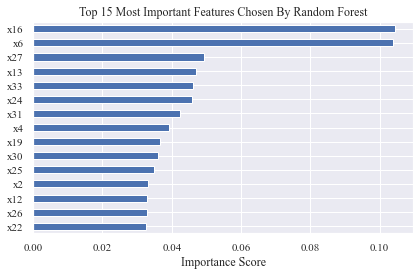

In [115]:

rfc=RandomForestClassifier(random_state=19)
rfc.fit(Xtrain, ytrain.values.ravel())
proba_pred=rfc.predict_proba(Xeva)
y_pred=rfc.predict(Xeva)
y_true =yeva

feature_names = list(Xtrain.columns)

feature_importances = pd.Series(
    rfc.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = feature_importances.iloc[-15:].plot.barh()
ax.set_title("Top 15 Most Important Features Chosen By Random Forest")
ax.set_xlabel("Importance Score")
ax.figure.tight_layout()



feature_importances=forest.feature_importances_
names=Xtrain.columns
list_feature_importances=list(zip(feature_importances,names))
df_feature_importances=pd.DataFrame(list_feature_importances)
df_feature_importances.to_excel("C:\\Users\Administrator\\Desktop\\RF变量信息增益.xlsx")
